In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\ebadu\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA = df[df['job_title_short'] == 'Data Engineer'].copy()

In [3]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

In [4]:
df_DA_explode= df_DA.explode('job_skills')

In [5]:
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,2897,3,263,175,8,400,0,4,16,37,...,5,371,10,432,0,0,1,0,151,59
2,2132,2,195,112,6,313,0,4,8,30,...,5,319,7,321,0,0,1,5,103,33
3,2187,5,205,92,7,340,3,4,8,19,...,6,270,8,328,0,1,0,0,124,29
4,2162,4,179,158,2,298,2,1,6,19,...,5,252,6,261,0,0,0,2,97,21
5,1988,1,167,153,3,272,0,4,7,9,...,1,232,5,233,0,0,0,1,93,23
6,2254,3,235,141,5,320,3,0,8,20,...,4,274,11,275,1,0,3,0,100,28
7,2015,9,208,99,0,268,0,0,9,18,...,7,302,6,246,2,0,0,0,76,28
8,2111,16,201,127,1,278,2,6,4,25,...,2,312,9,272,1,0,1,0,121,23
9,1812,5,186,91,4,259,1,2,4,13,...,3,276,9,256,0,0,4,1,101,20


In [6]:
# Create a total row
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
# Order columns by total count
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
# Drop total row
df_DA_pivot = df_DA_pivot.drop('Total')

df_DA_pivot

job_skills,sql,python,aws,azure,spark,java,kafka,hadoop,scala,databricks,...,workfront,fastify,mattermost,dlib,homebrew,ember.js,asp.netcore,dingtalk,linode,chainer
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,12987,12426,6924,7138,6567,4246,3687,3533,3517,3002,...,0,0,1,0,0,0,0,0,0,0
2,9792,9378,5446,5278,4948,3300,2809,2774,2625,2272,...,0,0,0,0,0,0,0,0,0,0
3,9831,9410,5580,5283,4764,3223,2689,2592,2621,2378,...,0,0,0,0,0,0,0,0,0,0
4,8975,8670,5012,4901,4316,2931,2329,2340,2373,2170,...,0,0,0,0,3,0,0,0,0,1
5,8411,8169,4768,4466,3991,2725,2166,2195,2132,2034,...,0,0,0,0,0,0,1,0,0,0
6,9713,9216,5280,5091,4654,3092,2516,2468,2464,2317,...,1,0,0,0,0,0,0,0,0,0
7,9032,8493,5015,4857,4044,2757,2296,2235,2213,2161,...,2,0,0,2,0,0,0,0,0,0
8,9565,9016,5330,5070,4436,2961,2468,2421,2427,2310,...,1,0,0,0,0,0,1,0,0,0
9,8663,8213,4612,4646,3902,2584,2088,2024,2070,2198,...,0,0,2,0,0,0,0,0,1,0


In [7]:
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

df_DA_pivot

job_skills,sql,python,aws,azure,spark,java,kafka,hadoop,scala,databricks,...,workfront,fastify,mattermost,dlib,homebrew,ember.js,asp.netcore,dingtalk,linode,chainer
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,12987,12426,6924,7138,6567,4246,3687,3533,3517,3002,...,0,0,1,0,0,0,0,0,0,0
Feb,9792,9378,5446,5278,4948,3300,2809,2774,2625,2272,...,0,0,0,0,0,0,0,0,0,0
Mar,9831,9410,5580,5283,4764,3223,2689,2592,2621,2378,...,0,0,0,0,0,0,0,0,0,0
Apr,8975,8670,5012,4901,4316,2931,2329,2340,2373,2170,...,0,0,0,0,3,0,0,0,0,1
May,8411,8169,4768,4466,3991,2725,2166,2195,2132,2034,...,0,0,0,0,0,0,1,0,0,0
Jun,9713,9216,5280,5091,4654,3092,2516,2468,2464,2317,...,1,0,0,0,0,0,0,0,0,0
Jul,9032,8493,5015,4857,4044,2757,2296,2235,2213,2161,...,2,0,0,2,0,0,0,0,0,0
Aug,9565,9016,5330,5070,4436,2961,2468,2421,2427,2310,...,1,0,0,0,0,0,1,0,0,0
Sep,8663,8213,4612,4646,3902,2584,2088,2024,2070,2198,...,0,0,2,0,0,0,0,0,1,0


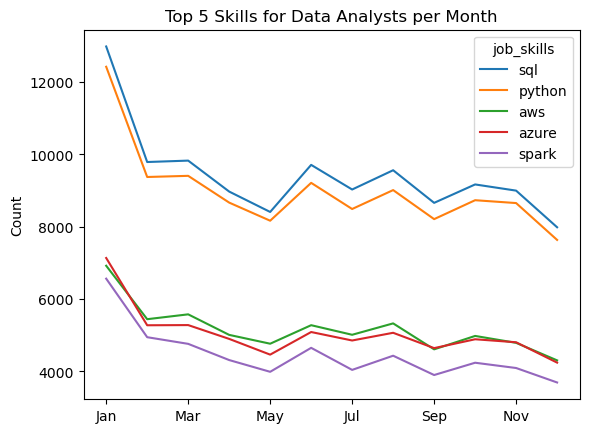

In [8]:
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()